# Non-Graded Challenge 11

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
#load dataset
data = pd.read_csv('E:\Hacktiv8\learning_journal\Phase_0\week_3\covid_19_indonesia_time_series_all.csv')
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


In [3]:
#melihat semua kolom
data.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [4]:
#tipe data dari setiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
#mengecek missing value
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                21759
Province                         642
Country                            0
Continent                          0
Island                           642
Time Zone                        642
Special Status                 18636
Total Regencies                    0
Total Cities                     614
Total Districts                    0
Total Urban Villages             617
Total Rural Villages             642
Area (km2)                         0
Population                         0
Population Density                 0
L

In [6]:
#membuat copy dataset
data1 = data.copy()

In [7]:
#menghapus kolom City or Regency karena isinya merupakan NaN
data1.drop(['City or Regency'], axis=1, inplace=True)
data1

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


Mengisi missing value pada kolom Province, Island, Time zone, Special Status dengan menggunakan 'none' karena data tersebut berupa object

In [8]:
data1['Province'].fillna('None', inplace=True)
data1['Island'].fillna('None', inplace=True)
data1['Time Zone'].fillna('None', inplace=True)
data1['Special Status'].fillna('None', inplace=True)

Mengisi missing value dengan '0' pada data yang bertipe float

In [9]:
data1['Total Cities'].fillna('0', inplace=True)
data1['Total Urban Villages'].fillna('0', inplace=True)
data1['Total Rural Villages'].fillna('0', inplace=True)
data1['Growth Factor of New Cases'].fillna('0', inplace=True)
data1['Growth Factor of New Deaths'].fillna('0', inplace=True)

In [10]:
#mengecek jumlah missing value secara keseluruhan dataset
data1.isnull().sum().sum()

0

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  Province                     21759 non-null  object 
 13  Country         

Cari Measure of Central Tendency dari data tersebut.

ringkasan dari suatu data yang menggambarkan pusat data.

In [12]:
#melihat central of tendency untuk semua kolom
data1.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Districts,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,21759.000000,21759.000000,2.175900e+04,2.175900e+04,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,24.160256,420.444368,1.112418e+05,1.547817e+07,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,68.708265,1199.018696,3.203746e+05,4.483574e+07,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,1.000000,44.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,7.000000,103.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,11.000000,169.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,18.000000,289.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,416.000000,7230.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000


mencari central tendency dari kolom Total Cases per Million 

Minimum, merupakan nilai yang paling kecil dari kumpulan data

In [13]:
# mencari nilai minimum
print ('Min: ' + str(data1['Total Cases per Million'].min()))

Min: 0.01


Modus atau mode, merupakan nilai yang sering muncul atau memiliki frekuensi yang paling banyak

In [14]:
# mencari modus
print ('Mode: ' + str(data1['Total Cases per Million'].mode()[0]))

Mode: 0.33


Median, merupakan nilai tengah dari suatu data. sebelum mementukan median dan terlebih dahulu diurutkan dari kecil ke besar

In [15]:
# mencari median atau nilai tengah
print ('Median: ' + str(data1['Total Cases per Million'].median()))

Median: 2727.46


Mean, merupakan nilai rata2 dari kumpulan data

In [16]:
# mencari rata-rata data
print ('Mean: ' + str(data1['Total Cases per Million'].mean()))

Mean: 6183.65058780272


Maximum, merupakan nilai yang paling besar dari kumpulan data

In [17]:
# mencari nilai maximum
print ('Max: ' + str(data1['Total Cases per Million'].max()))

Max: 79663.79


membuat histogram dari kolom Total Cases per Million

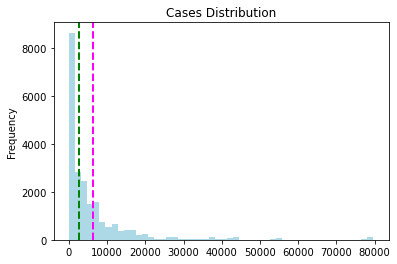

In [18]:
# melihat distribusi yang terjadi
cases = data1['Total Cases per Million']
cases.plot.hist(title='Cases Distribution', color='lightblue', bins=50)  
plt.axvline(cases.mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
plt.axvline(cases.median(), color='green', linestyle='dashed', linewidth=2) # median
plt.show()

Berdasarkan distribusi dari histogram diatas dapat diketahui bahwa 'Total Cases per Million' adalah right skewness karena persebaran datanya lebih banyak pada bagian kiri dan ekornya pada sebelah kanan. Jadi bukan distribusi normal.

noted--Magenta: mean dan Green: median

Melihat nilai dari skewness dan kurtosis kolom Total Cases per Million

Skewness, ukuran simestris atau kemiringan dalam distribusi

Kurtosis, ukuran data apakah memiliki outliner atau tidak dibandingkan dengan distribusi normal

In [19]:
# mencari nilai dari skewness
print(' skewness: ' + str(data1['Total Cases per Million'].skew()))
# mencari nilai dari kurtosis
print(' kurtosis: ' + str(data1['Total Cases per Million'].kurt()))

 skewness: 3.7400931648849896
 kurtosis: 18.220499141462696


Skewness value :  3.7400931648849896


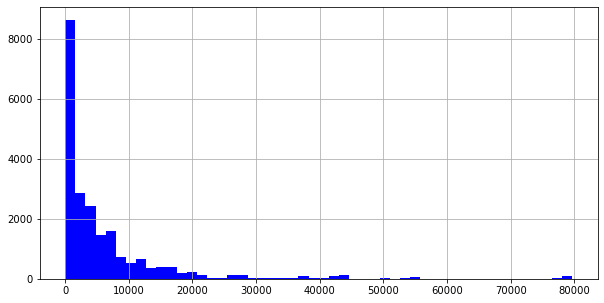

In [20]:
print('Skewness value : ', data1['Total Cases per Million'].skew())
data1['Total Cases per Million'].hist(bins=50, figsize=(10,5), color='blue')
plt.show()

Telah diperoleh nilai skewness 3.7400931648849896 yang artinya masuk ke right skewnees atau highly skewness karena nilainya lebih daripada rentang -1 sampai 1

Cari Measure of Variance dari data tersebut.

Range, menggambarkan selisih data yang paling besar dan paling kecil secara general

In [21]:
# mencari range
print(' range: ' + str(data1['Total Cases per Million'].max() - data1['Total Cases per Million'].min()))

 range: 79663.78


Percentile, merupakan pembagian nilai kuatil menjadi 3 bagian yaitu 25%, 50% dan 75% dari kumpulan data

In [22]:
# jika data yang diinginkan tidak masuk dalam pengukuran menggunakan 'strict'
print(stats.percentileofscore(data1['Total Cases per Million'], 1000, 'strict'))

33.498782113148586


In [23]:
# jika data yang diinginkan tidak masuk dalam pengukuran menggunakan 'weak'
print(stats.percentileofscore(data1['Total Cases per Million'], 1000, 'weak'))

33.498782113148586


Quartiles, nilai yng diamati pada suatu titik dan dibagi dalam 4 bagian

In [24]:
print(data1['Total Cases per Million'].quantile([0.25, 0.5, 0.75]))

0.25     415.915
0.50    2727.460
0.75    7374.120
Name: Total Cases per Million, dtype: float64


Box plot, untuk menvisualisasikan dari quartiles

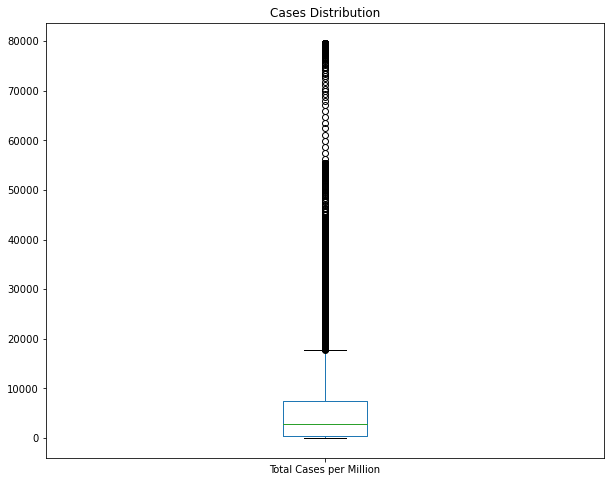

In [25]:
# Plot a box-whisker chart
data1['Total Cases per Million'].plot(kind='box', title='Cases Distribution', figsize=(10,8))
plt.show()

karena diketahui bahwa kolom Total Cases per Million adalah right skewness, jadi banyak data yang berada pada outliner sebelah kanan

Variance, diukur sebagai rata-rata perbedaan kuadrat dari mean

In [26]:
print(data1['Total Cases per Million'].var())

105845481.90650856


Standar deviasi, merupakan akar dari variasi dan rentang data secara spesifik(posisi)

In [27]:
print(data1['Total Cases per Million'].std())

10288.123342306339


Z-score, merupakan suatu ukuran penyimpangan data dari nilai rata-ratanya yang diukur dalam satuan standar deviasinya. Jika nilainya terletak diatas rata-rata maka Z score-nya akan bernilai positif, sedangkan apabila nilainya dibawah nilai rata-rata maka Z score-nya akan bernilai negatif.

In [28]:
stats.zscore(data1['Total Cases per Million'])

array([-0.60071136, -0.60069387, -0.60106032, ...,  0.10790646,
        0.0919022 ,  0.95939812])